# Applied Data Science Case Study - LGD Schätzung

Paul Haimerl: Paul.haimerl@stud.uni-regensburg.de (2099707), Alexander Freundl: Alexander.Freundl@stud.uni-regensburg.de (2021304), Julian Bleyer: Julian.bleyer@stud.uni-regensburg.de (2102164), Andreas Priller: Andreas.priller@stud.uni-regensburg.de (2116376), Robin Siepmann: Robin.siepmann@stud.uni-regensburg.de (2088557 ?), Jonas Kreilinger: Jonas.kreilinger@stud.uni-regensburg.de (2086675)



In [1]:
#Import notwendiger libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import math

import os 
import warnings
warnings.filterwarnings('ignore')

#Import des Panel-Datensatzes 
data_lgd = pd.read_csv('LGD_Panel.csv')

In [2]:
#Bestimmung von Datentypen 
print(data_lgd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62178 non-null  int64  
 1   time                     62178 non-null  int64  
 2   orig_time                62178 non-null  int64  
 3   first_time               62178 non-null  int64  
 4   mat_time                 62178 non-null  int64  
 5   res_time                 1160 non-null   float64
 6   balance_time             62178 non-null  float64
 7   LTV_time                 62153 non-null  float64
 8   interest_rate_time       62178 non-null  float64
 9   rate_time                62178 non-null  float64
 10  hpi_time                 62178 non-null  float64
 11  gdp_time                 62178 non-null  float64
 12  uer_time                 62178 non-null  float64
 13  REtype_CO_orig_time      62178 non-null  int64  
 14  REtype_PU_orig_time   

In [3]:
#Darstellen der Features mit NaN in Trainings- und Testset  
print('columns with null values:\n', data_lgd.isnull().sum())
print('-'*33)


columns with null values:
 id                             0
time                           0
orig_time                      0
first_time                     0
mat_time                       0
res_time                   61018
balance_time                   0
LTV_time                      25
interest_rate_time             0
rate_time                      0
hpi_time                       0
gdp_time                       0
uer_time                       0
REtype_CO_orig_time            0
REtype_PU_orig_time            0
REtype_SF_orig_time            0
investor_orig_time             0
balance_orig_time              0
FICO_orig_time                 0
LTV_orig_time                  0
Interest_Rate_orig_time        0
state_orig_time              350
hpi_orig_time                  0
default_time                   0
payoff_time                    0
status_time                    0
lgd_time                   60653
recovery_res               60653
dtype: int64
---------------------------------


In [4]:
#Überblick über wichtige Kennzahlen des Trainings- und Testsets
data_lgd.describe()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
count,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,1160.000000,6.217800e+04,62153.000000,62178.000000,62178.000000,...,6.217800e+04,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,1525.000000,1.525000e+03
mean,25371.293528,35.877979,20.688218,24.649185,137.722651,40.711207,2.448294e+05,83.320156,6.663767,4.516695,...,2.545839e+05,673.357200,78.702839,5.600969,198.501593,0.024526,0.042218,0.108961,0.495982,1.324083e+05
std,13737.375198,11.652381,7.377185,6.838495,19.016813,9.276421,2.089384e+05,28.106665,2.100772,0.513379,...,2.115463e+05,72.100064,10.243045,2.985547,33.758503,0.154678,0.201087,0.426060,0.381771,1.501463e+05
min,4.000000,1.000000,-40.000000,1.000000,18.000000,7.000000,0.000000e+00,0.000000,0.000000,1.650000,...,0.000000e+00,429.000000,50.100000,0.000000,75.730000,0.000000,0.000000,0.000000,0.000000,-1.909486e+05
25%,13711.250000,28.000000,18.000000,21.000000,137.000000,35.000000,1.008911e+05,67.056456,5.625000,4.240000,...,1.075000e+05,628.000000,75.000000,4.875000,186.910000,0.000000,0.000000,0.000000,0.104600,3.644842e+04
50%,25572.000000,34.000000,22.000000,25.000000,142.000000,40.000000,1.809344e+05,82.256173,6.625000,4.600000,...,1.880000e+05,675.000000,80.000000,6.250000,216.770000,0.000000,0.000000,0.000000,0.514654,8.948393e+04
75%,37326.000000,44.000000,25.000000,28.000000,145.000000,47.000000,3.337000e+05,100.766023,7.820000,4.710000,...,3.500000e+05,730.000000,80.000000,7.388000,223.750000,0.000000,0.000000,0.000000,0.768253,1.832579e+05
max,49972.000000,60.000000,60.000000,60.000000,229.000000,60.000000,3.106990e+06,803.513550,37.500000,8.650000,...,3.107000e+06,819.000000,119.800000,15.000000,226.290000,1.000000,1.000000,2.000000,2.022767,1.518109e+06


Die deskriptiven Statistiken lassen keine unrealistischen Ausreißer erkennen

Dadurch, dass die LGD geschätzt wird, werden nur die Beobachtungen betrachtet, die einen abgeschlossenen Ausfall darstellen.
Ein abgeschlossener Ausfall wird durch das Vorhandensein der Variable res_time definiert.
res_time: Gibt den Zeitpunkt der Erklärung des Ausfalls an und beträgt für nicht beendete Ausfälle und für Nicht-Ausfälle NaN.  

In [5]:
#Beschränken des Datensets auf Schuldner, deren Kredit ausgefallen ist
data_lgd = data_lgd[data_lgd['default_time'] == 1]
data_lgd_new = data_lgd.dropna(subset = ['res_time'])
data_lgd_new.head()


,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
263,191,31,23,26,143,38.0,223884.74,87.176730,7.360,4.39,...,630,80.0,7.360,FL,221.91,1,0,1,0.883919,25988.76
356,330,33,27,28,147,43.0,144374.85,98.272701,9.045,4.71,...,613,80.0,9.045,FL,222.39,1,0,1,1.236213,-34103.22
360,331,31,26,28,147,60.0,285484.83,89.452618,10.620,4.64,...,605,80.0,10.620,FL,225.10,1,0,1,0.706870,83684.11
372,343,42,27,32,148,44.0,79140.44,121.463371,8.870,4.71,...,633,90.0,8.870,MD,222.39,1,0,1,1.077359,-6122.26
420,385,39,28,32,88,41.0,150074.42,122.611681,9.820,4.65,...,584,95.0,9.820,TX,219.67,1,0,1,0.351805,97277.45


In [6]:
#Anzahl der null values nach erster Beschränkung des Datensets
print(data_lgd_new.isnull().sum())
print('-'*33)
print(data_lgd_new.shape)

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
res_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
rate_time                  0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
state_orig_time            5
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
lgd_time                   0
recovery_res               0
dtype: int64
---------------------------------
(1160, 28)


Die oben zu erkennenden Missing-values der Variable state_orig_time werden im Folgenden entfernt. Aufgrund der geringen Anzahl (5) an Missing-values ist eine extra Kategorisierung nicht sinnvoll. 

In [7]:
#Entfernen der NaN in 'state_orig_time'
data_lgd_new = data_lgd_new.dropna(subset = ['state_orig_time'])

print(data_lgd_new.isnull().sum())
print(data_lgd_new.shape)

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
res_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
rate_time                  0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
state_orig_time            0
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
lgd_time                   0
recovery_res               0
dtype: int64
(1155, 28)


Auf Basis der bereits bestehenden Features werden neue Erklärvariablen konstruiert. Dabei erstellen wir:
-res_duration: Dauer bis zur Klärung des Ausfalls 
-planned_lifetime: Geplante Laufzeit des Kredits 
-realized_lifetime: Laufzeit des Kredits bis zum Ausfall
-rel_realized_lifetime: Verhältnis realized_lifetime zur planned_lifetime
-remaining_lifetime: Ausstehende Laufzeit bis zum vertraglichen Ende der Laufzeit bei Ausfall
-......

In [8]:
#Entwickeln neuer Features
data_lgd_new.loc[:, "res_duration"] = data_lgd_new.loc[:, "res_time"] - data_lgd_new.loc[:, 'time']
data_lgd_new.loc[:, "planned_lifetime"] = data_lgd_new.loc[:, "mat_time"] - data_lgd_new.loc[:, "orig_time"]
data_lgd_new.loc[:, "realized_lifetime"] = data_lgd_new.loc[:, "time"] - data_lgd_new.loc[:, "orig_time"]
data_lgd_new.loc[:, "rel_realized_lifetime"] = data_lgd_new.loc[:, "realized_lifetime"] / data_lgd_new.loc[:, "planned_lifetime"]
data_lgd_new.loc[:, "remaining_lifetime"] = data_lgd_new.loc[:, "planned_lifetime"] - data_lgd_new.loc[:, "realized_lifetime"]
data_lgd_new.loc[:, "diff_LTV"] = data_lgd_new.loc[:, "LTV_time"] - data_lgd_new.loc[:, "LTV_orig_time"]
data_lgd_new.loc[:, "rel_diff_LTV"] = data_lgd_new.loc[:, "LTV_time"] / data_lgd_new.loc[:, "LTV_orig_time"]
data_lgd_new.loc[:, "diff_hpi"] = data_lgd_new.loc[:, "hpi_time"] - data_lgd_new.loc[:, "hpi_orig_time"]
data_lgd_new.loc[:, "rel_diff_hpi"] = data_lgd_new.loc[:, "hpi_time"] / data_lgd_new.loc[:, "hpi_orig_time"]
data_lgd_new.loc[:, "diff_interest_rate"] = data_lgd_new.loc[:, "interest_rate_time"] - data_lgd_new.loc[:, "Interest_Rate_orig_time"]
data_lgd_new.loc[:, "rel_diff_interest_rate"] = data_lgd_new.loc[:, "interest_rate_time"] / data_lgd_new.loc[:, "Interest_Rate_orig_time"]

Da es sich bei state_orig_time um eine kategoriale Variable handelt, wird diese als Dummy codiert.

In [9]:
state_dummies = pd.get_dummies(data_lgd_new['state_orig_time'])
data_lgd_new = pd.concat([data_lgd_new, state_dummies], axis = 1)

In [10]:
#Ausfälle pro Staat
defaults_state = data_lgd_new['state_orig_time'].value_counts()
print(defaults_state)

CA    281
FL    158
AZ     54
TX     52
NV     50
GA     49
MI     41
IL     39
OH     37
WA     30
VA     27
MD     26
MN     25
CO     23
MO     23
NY     19
NC     17
OR     16
TN     16
NJ     16
IN     16
MA     16
SC     11
LA     10
PA      9
AL      9
CT      8
UT      8
ME      7
OK      7
MS      6
WI      6
IA      5
HI      4
KY      4
NH      3
ID      3
KS      3
DC      3
NM      3
DE      3
AR      2
NE      2
WV      2
WY      1
RI      1
PR      1
SD      1
MT      1
AK      1
Name: state_orig_time, dtype: int64


Aufgrund der geringen Ausssagekraft werden Staaten mit einer Ausfallzahl <= 5 aus dem Datensatz entfernt. Somit wird Schätzvarianz verringert ohne den Erklärwert des Modells erheblich zu beeinflussen.

In [11]:
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['AK']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['RI']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['PR']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['MT']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['WY']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['SD']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['AR']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['WV']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['NE']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['KS']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['ID']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['NH']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['DC']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['DE']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['NM']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['HI']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['KY']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['IA']==1].index, inplace=True)


In [12]:
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'AK']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'RI']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'PR']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'WY']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'MT']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'SD']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'WV']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'NE']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'AR']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'NM']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'KS']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'ID']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'DE']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'DC']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'NH']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'KY']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'HI']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'IA']
data_lgd_new.shape

(1112, 71)

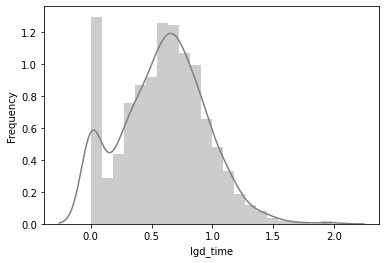

In [13]:
sns.distplot(data_lgd_new.lgd_time, color='grey')
plt.ylabel('Frequency')
plt.show()

Der Plot zeigt die Verteilung der Outcome-variable an. Zu erkennen ist eine Häufung von sehr kleinen LGDs, die nicht der allgemeinen LGD-verteilung folgen. Des Weiteren ist eine geringe Anzahl von überdurchschnittlich großen LGDs zu beobachten. Um die Güte des Modells zu erhöhen werden alle LGD-realisationen über 1 gewinsorized. Um später eventuell den Log auf das Outcome anzuwenden, werden LGD realisationen auf 0,001 gefloored.

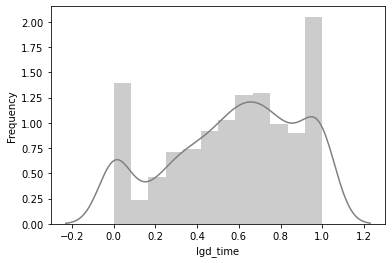

count    1112.00
mean        0.57
std         0.31
min         0.00
25%         0.36
50%         0.61
75%         0.83
max         1.00
Name: lgd_time, dtype: float64

In [14]:
#Winsorizen der lgd_time um realisationen zwischen 1 und 0 zu erhalten
data_lgd_new.loc[data_lgd_new['lgd_time'] >= 1, 'lgd_time'] = 1
data_lgd_new.loc[data_lgd_new['lgd_time'] <= 0, 'lgd_time'] = 0.0001



sns.distplot(data_lgd_new.lgd_time, color='grey')
plt.ylabel('Frequency')
plt.show()



data_lgd_new.lgd_time.describe().round(decimals = 2)


In [26]:
#Korrelation der Features mit lgd_time
#print('-'*35)
print(data_lgd_new.corr()['lgd_time'])

time                       0.156099
orig_time                  0.299910
first_time                 0.297983
mat_time                   0.137891
res_time                   0.298962
balance_time              -0.098876
LTV_time                   0.276000
interest_rate_time         0.136174
gdp_time                  -0.175761
investor_orig_time         0.087409
balance_orig_time         -0.104955
Interest_Rate_orig_time    0.105777
hpi_orig_time              0.319776
lgd_time                   1.000000
res_duration               0.295148
diff_LTV                   0.277939
rel_diff_LTV               0.275936
diff_hpi                  -0.293379
rel_diff_hpi              -0.273763
AL                         0.019017
AZ                         0.012241
CA                        -0.038625
CO                        -0.119043
CT                        -0.028635
FL                         0.197111
GA                        -0.031399
IL                         0.089980
IN                         0

Die Tabelle gibt die univariaten Korrelationen der Features zur lgd_time aus. Features mit Korrelationen unter dem Cutoff-Wert von ...!!!!! werden entfernt.

In [16]:
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'id']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rate_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'hpi_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'uer_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_CO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_PU_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_SF_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'FICO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'LTV_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'default_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'payoff_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'status_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'planned_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_planned_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rel_realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'remaining_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_remaining_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_diff_LTV']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_LTV_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_balance_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_FICO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'state_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'diff_interest_rate']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rel_diff_interest_rate']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'recovery_res']                                

In [17]:
data_lgd_new.describe()

,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,gdp_time,investor_orig_time,...,OK,OR,PA,SC,TN,TX,UT,VA,WA,WI
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1.112000e+03,1112.000000,1112.000000,1112.000000,1112.000000,...,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000
mean,34.157374,22.723921,25.640288,142.566547,40.810252,2.437148e+05,96.817392,7.715757,0.462568,0.154676,...,0.006295,0.014388,0.008094,0.009892,0.014388,0.046763,0.007194,0.024281,0.026978,0.005396
std,7.945441,6.049321,5.120872,13.281386,9.210556,1.673495e+05,21.075637,1.962222,2.330932,0.361758,...,0.079126,0.119140,0.089640,0.099010,0.119140,0.211225,0.084551,0.153988,0.162093,0.073290
min,3.000000,-21.000000,1.000000,40.000000,9.000000,1.256519e+04,19.565958,2.000000,-4.146711,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,21.000000,24.000000,141.000000,35.000000,1.198230e+05,82.968773,6.625000,-0.314448,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,25.000000,27.000000,144.000000,40.000000,2.012474e+05,98.521344,7.700000,1.229172,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,26.000000,29.000000,147.000000,47.000000,3.235963e+05,112.143608,8.900000,2.229868,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58.000000,31.000000,52.000000,189.000000,60.000000,1.317836e+06,155.613265,13.500000,4.320114,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Die folgenden Grafiken zeigen Plots der inkludierten Features gegenüber der lgd_time an. Generell ist für die Features kein starker Zusammenhang grafisch erkennbar.  

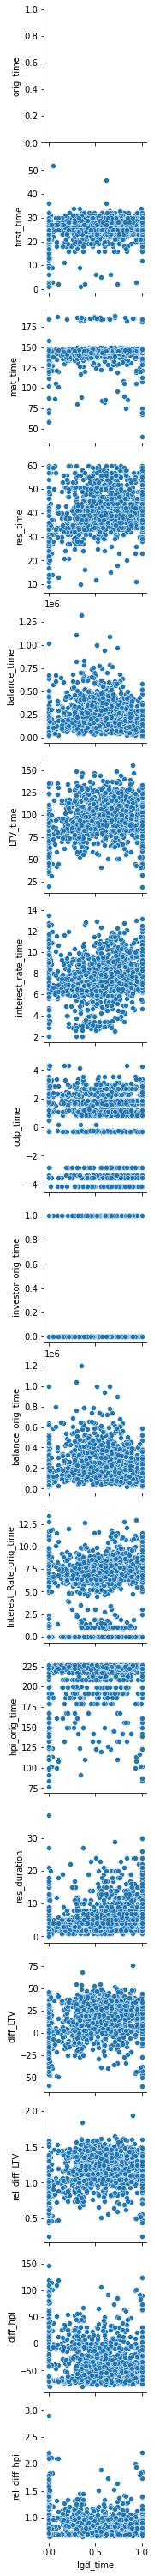

In [18]:
sns.pairplot(data_lgd_new,
             x_vars = ['lgd_time'],
             y_vars = [ 'orig_time', 'first_time', 'mat_time', 'res_time', 'balance_time', 'LTV_time', 'interest_rate_time', 'gdp_time', 'investor_orig_time', 'balance_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time', 'res_duration', 'diff_LTV', 'rel_diff_LTV', 'diff_hpi', 'rel_diff_hpi'],
             
            )
plt.show()

In [19]:
#Splitten in Trainings- und Testset (bei timestamp 45)
lgd_train = data_lgd_new[data_lgd_new['time'] < 45]
lgd_test = data_lgd_new[data_lgd_new['time'] >= 45]

In [20]:
#?
data_less_time_train = lgd_train.loc[:, lgd_train.columns != 'time']
data_less_time_test = lgd_test.loc[:, lgd_test.columns != 'time']

y_train = data_less_time_train['lgd_time']
x_train = data_less_time_train.loc[:, data_less_time_train.columns != 'lgd_time']

y_test = data_less_time_test['lgd_time']
x_test = data_less_time_test.loc[:, data_less_time_test.columns != 'lgd_time']


In [21]:
#Importieren des StandardScalers
from sklearn.preprocessing import StandardScaler

#Standardisieren der features
scaler = StandardScaler()

#Nur das Trainingsset fitten
scaler.fit(x_train)

#Transformieren von Trainings- und Testset
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Um die Performance der späteren PCA zu verbessern, werden die Features zentriert und normalisiert. Dimensionsverringerungsalgorithmen wie die PCA können zu einer besseren Performance des Modells beitragen, indem die Schätzvarianz verringert wird und der 'Curse of dimensions' abgeschwächt wird. Die PCA wird auf alle Features angewendet. Wir behalten die Anzahl der PCAs, welche 90% der Variation der Features erklären 

In [22]:
from sklearn.decomposition import PCA 
#Ausgeben der principle components, sodass 90% der varianz erhalten bleiben 
pca = PCA(.90)

Anzahl benötigter principal Komponents
----------------------------------------
34


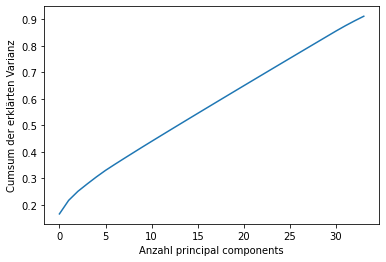

In [23]:
#Fit der PCA auf das Trainingsset
pca.fit(x_train_scaled)

#Plot der kumulativen Summe der erklärten Varianz
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Anzahl principal components')
plt.ylabel('Cumsum der erklärten Varianz')

#Anzahl benötigter Komponenten
print('Anzahl benötigter principal Komponents')
print('-'*40)
print(pca.n_components_)

In [24]:
#Transformieren von Trainings- und Testset
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [25]:
#Schaffen der neuen Datensätze 
PCA_train = pd.DataFrame(data=x_train_pca, columns=['principle_component1','principle_component2','principle_component3','principle_component4','principle_component5','principle_component6','principle_component7','principle_component8','principle_component9','principle_component10','principle_component11','principle_component12','principle_component13','principle_component14','principle_component15','principle_component16','principle_component17','principle_component18','principle_component19','principle_component20','principle_component21','principle_component22','principle_component23','principle_component24','principle_component25','principle_component26','principle_component27'])
PCA_test = pd.DataFrame(data=x_test_pca, columns=['principle_component1','principle_component2','principle_component3','principle_component4','principle_component5','principle_component6','principle_component7','principle_component8','principle_component9','principle_component10','principle_component11','principle_component12','principle_component13','principle_component14','principle_component15','principle_component16','principle_component17','principle_component18','principle_component19','principle_component20','principle_component21','principle_component22','principle_component23','principle_component24','principle_component25','principle_component26','principle_component27'])

ValueError: Shape of passed values is (1004, 34), indices imply (1004, 27)

In [ ]:
PCA_train

In [ ]:
PCA_test

In [ ]:
#Importieren der Hyperparameter für die Decision Tree Modelle
%store -r dt_pca_params
%store -r dt_scaled_params
%store -r dt_base_params

In [ ]:
dt_pca_params = dict(dt_pca_params)
dt_scaled_params = dict(dt_scaled_params)
dt_base_params = dict(dt_scaled_params)

In [ ]:
dt_pca_df = pd.DataFrame(list(dt_pca_params.items()),columns = ['hyperparameters','values'])
dt_scaled_df = pd.DataFrame(list(dt_scaled_params.items()),columns = ['hyperparameters','values'])
dt_base_df = pd.DataFrame(list(dt_base_params.items()),columns = ['hyperparameters','values'])

In [ ]:
print(dt_pca_df)
print('-'*40)
print(dt_scaled_df)
print('-'*40)
print(dt_base_df)

In [ ]:
#Importieren der Hyperparameter für die Random Forest Modelle
%store -r rf_pca_params
%store -r rf_scaled_params
%store -r rf_base_params

In [ ]:
rf_pca_params = dict(rf_pca_params)
rf_scaled_params = dict(rf_scaled_params)
rf_base_params = dict(rf_scaled_params)

In [ ]:
rf_pca_df = pd.DataFrame(list(rf_pca_params.items()),columns = ['hyperparameters','values'])
rf_scaled_df = pd.DataFrame(list(rf_scaled_params.items()),columns = ['hyperparameters','values'])
rf_base_df = pd.DataFrame(list(rf_base_params.items()),columns = ['hyperparameters','values'])

In [ ]:
print(rf_pca_df)
print('-'*40)
print(rf_scaled_df)
print('-'*40)
print(rf_base_df)

In [ ]:
#Importieren der Hyperparameter für die Gradient Boosting Modelle
%store -r gbr_pca_params
%store -r gbr_scaled_params
%store -r gbr_base_params

In [ ]:
gbr_pca_params = dict(gbr_pca_params)
gbr_scaled_params = dict(gbr_scaled_params)
gbr_base_params = dict(gbr_scaled_params)

In [ ]:
gbr_pca_df = pd.DataFrame(list(gbr_pca_params.items()),columns = ['hyperparameters','values'])
gbr_scaled_df = pd.DataFrame(list(gbr_scaled_params.items()),columns = ['hyperparameters','values'])
gbr_base_df = pd.DataFrame(list(gbr_base_params.items()),columns = ['hyperparameters','values'])

In [ ]:
print(gbr_pca_df)
print('-'*40)
print(gbr_scaled_df)
print('-'*40)
print(gbr_base_df)

In [ ]:
#Decision Tree mit PCA
#Importieren notwendiger Libraries für eine Decision Tree Regression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.tree import DecisionTreeRegressor 

#Erstellen des Modells
dtr1 = DecisionTreeRegressor(max_depth = dt_pca_df.iloc[0, 1].astype(np.int64),
                             max_features = dt_pca_df.iloc[1,1].astype(np.int64),
                             min_impurity_decrease = dt_pca_df.iloc[2,1].astype(np.float64),
                             min_samples_leaf = dt_pca_df.iloc[3,1].astype(np.int64),
                             min_samples_split = dt_pca_df.iloc[4,1].astype(np.int64))
#Fitten des Modells
dtr = dtr1.fit(x_train_pca, y_train)

#Schätzen der target variable in sample und out of sample
y_dt_pca_is = dtr1.predict(x_train_pca)
y_dt_pca_os = dtr1.predict(x_test_pca)

#MAE berechnen 
mae_dt_pca = MAE(y_test, y_dt_pca_os)

#MSE berechnen 
mse_dt_pca = MSE(y_test, y_dt_pca_os)

#RMSE berechnen 
rmse_dt_pca = mse_dt_pca**(1/2)

#MSE/RMSE
print('MAE decision tree PCA\n:', mae_dt_pca)
print('-'*45)
print('MSE decision tree PCA\n:', mse_dt_pca)
print('-'*45)
print('RMSE decision tree PCA\n:', rmse_dt_pca)


In [ ]:
plt.subplot(211)
sns.regplot(y_train, y_dt_pca_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree PCA in sample')

plt.subplot(212)
sns.regplot(y_test, y_dt_pca_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree PCA out of sample')


plt.show()

In [ ]:
#Decision Tree mit skalierten features
#Importieren notwendiger Libraries für eine Decision Tree Regression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor 

dtr2 = DecisionTreeRegressor(max_depth = dt_scaled_df.iloc[0, 1].astype(np.int64),
                             max_features = dt_scaled_df.iloc[1,1].astype(np.int64),
                             min_impurity_decrease = dt_scaled_df.iloc[2,1].astype(np.float64),
                             min_samples_leaf = dt_scaled_df.iloc[3,1].astype(np.int64),
                             min_samples_split = dt_scaled_df.iloc[4,1].astype(np.int64))

dtr2.fit(x_train_scaled, y_train)


y_dt_scaled_is = dtr2.predict(x_train_scaled)
y_dt_scaled_os = dtr2.predict(x_test_scaled)

#MAE berechnen 
mae_dt_sc = MAE(y_test, y_dt_scaled_os)

#MSE berechnen 
mse_dt_sc = MSE(y_test, y_dt_scaled_os)

#RMSE berechnen 
rmse_dt_sc = mse_dt_sc**(1/2)

#MSE/RMSE

print('MAE decision tree scaled\n:', mae_dt_sc)
print('-'*45)
print('MSE decision tree scaled\n:', mse_dt_sc)
print('-'*45)
print('RMSE decision tree scaled\n:', rmse_dt_sc)

In [ ]:
plt.subplot(211)
sns.regplot(y_train, y_dt_scaled_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree scaled in sample')

plt.subplot(212)
sns.regplot(y_test, y_dt_scaled_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree scaled out of sample')


plt.show()

In [ ]:
#Decision Tree mit base features
#Importieren notwendiger Libraries für eine Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

dtr3 = DecisionTreeRegressor(max_depth = dt_base_df.iloc[0, 1].astype(np.int64),
                             max_features = dt_base_df.iloc[1,1].astype(np.int64),
                             min_impurity_decrease = dt_base_df.iloc[2,1].astype(np.float64),
                             min_samples_leaf = dt_base_df.iloc[3,1].astype(np.int64),
                             min_samples_split = dt_base_df.iloc[4,1].astype(np.int64))

dtr3.fit(x_train, y_train)

y_dt_base_is = dtr3.predict(x_train)
y_dt_base_os = dtr3.predict(x_test)

#MAE berechnen
mae_dt_base = MAE(y_test, y_dt_base_os)
#MSE berechnen 
mse_dt_base = MSE(y_test, y_dt_base_os)

#RMSE berechnen 
rmse_dt_base = mse_dt_base**(1/2)

#MSE/RMSE
print('MAE decision tree base\n:', mae_dt_base)
print('-'*45)
print('MSE decision tree base\n:', mse_dt_base)
print('-'*45)
print('RMSE decision tree base\n:', rmse_dt_base)

In [ ]:
plt.subplot(211)
sns.regplot(y_train, y_dt_base_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree base in sample')

plt.subplot(212)
sns.regplot(y_test, y_dt_base_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree base out of sample')


plt.show()

In [ ]:
#Random Forest mit PCA
#Importieren notwendiger libraries
from sklearn.ensemble import RandomForestRegressor

rfr1 = RandomForestRegressor(max_depth = rf_pca_df.iloc[0,1],
                             max_features = rf_pca_df.iloc[1,1],
                             min_samples_split = rf_pca_df.iloc[2,1],
                             n_estimators = rf_pca_df.iloc[3,1] )

rfr1.fit(x_train_pca, y_train)

y_rf_pca_is = rfr1.predict(x_train_pca)
y_rf_pca_os = rfr1.predict(x_test_pca)

#MAE berechnen
mae_rf_pca = MAE(y_test, y_rf_pca_os)

#MSE berechnen
mse_rf_pca = MSE(y_test, y_rf_pca_os)

#RMSE berechnen 
rmse_rf_pca = mse_rf_pca**(1/2)

#MSE/RMSE ausgeben

print('MAE Random Forest PCA\n:', mae_rf_pca)
print('-'*45)
print('MSE Random Forest PCA\n:', mse_rf_pca)
print('-'*45)
print('RMSE Random Forest PCA\n:', rmse_rf_pca)

In [ ]:
plt.subplot(211)
sns.regplot(y_train, y_rf_pca_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest PCA in sample')

plt.subplot(212)
sns.regplot(y_test, y_rf_pca_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest PCA out of sample')


plt.show()

In [ ]:
#Random Forest mit skalierten features 
#Importieren notwendiger libraries
from sklearn.ensemble import RandomForestRegressor

rfr2 = RandomForestRegressor(max_depth = rf_scaled_df.iloc[0,1],
                             max_features = rf_scaled_df.iloc[1,1],
                             min_samples_split = rf_scaled_df.iloc[2,1],
                             n_estimators = rf_scaled_df.iloc[3,1])

rfr2.fit(x_train_scaled, y_train)

y_rf_scaled_is = rfr2.predict(x_train_scaled)
y_rf_scaled_os = rfr2.predict(x_test_scaled)

#MAE berechnen
mae_rf_sc = MAE(y_test, y_rf_scaled_os)

#MSE berechnen
mse_rf_sc = MSE(y_test, y_rf_scaled_os)

#RMSE berechnen 
rmse_rf_sc = mse_rf_sc**(1/2)

#MSE/RMSE/MAE ausgeben
print('MAE Random Forest scaled\n:', mae_rf_sc)
print('-'*45)
print('MSE Random Forest scaled\n:', mse_rf_sc)
print('-'*45)
print('RMSE Random Forest scaled\n:', rmse_rf_sc)

In [ ]:
plt.subplot(211)
sns.regplot(y_train, y_rf_scaled_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest scaled in sample')

plt.subplot(212)
sns.regplot(y_test, y_rf_scaled_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest scaled out of sample')


plt.show()

In [ ]:
#Random Forest mit base features 
#Importieren notwendiger libraries
from sklearn.ensemble import RandomForestRegressor

rfr3 = RandomForestRegressor(max_depth = rf_base_df.iloc[0,1],
                             max_features = rf_base_df.iloc[1,1],
                             min_samples_split = rf_base_df.iloc[2,1],
                             n_estimators = rf_base_df.iloc[3,1])

rfr3.fit(x_train, y_train)

y_rf_base_is = rfr3.predict(x_train)
y_rf_base_os = rfr3.predict(x_test)

#MAE berechnen
mae_rf_base = MAE(y_test, y_rf_base_os)

#MSE berechnen
mse_rf_base = MSE(y_test, y_rf_base_os)

#RMSE berechnen 
rmse_rf_base = mse_rf_base**(1/2)

#MSE/RMSE/MAE ausgeben
print('MAE Random Forest base\n:', mae_rf_base)
print('-'*45)
print('MSE Random Forest base\n:', mse_rf_base)
print('-'*45)
print('RMSE Random Forest base\n:', rmse_rf_base)

In [ ]:
plt.subplot(211)
sns.regplot(y_train, y_rf_base_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest base in sample')

plt.subplot(212)
sns.regplot(y_test, y_rf_base_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest base out of sample')


plt.show()

In [ ]:
#Gradient Boosted Tree mit PCA Daten
#Importieren notwendiger libraries
from sklearn.ensemble import GradientBoostingRegressor

gbr1 = GradientBoostingRegressor(learning_rate = gbr_pca_df.iloc[0,1].astype(np.float64),
                                 max_depth = gbr_pca_df.iloc[1,1].astype(np.int64),
                                 n_estimators = gbr_pca_df.iloc[2,1].astype(np.int64),
                                 subsample = gbr_pca_df.iloc[3,1].astype(np.float64))

gbr1.fit(x_train_pca, y_train)

#Schätzen der y-Werte, auf Basis der Daten der PCA, mit GradientBoostingRegressor nach Hyperparameter Tuning
y_gbr_pca_is = gbr1.predict(x_train_pca)
y_gbr_pca_os = gbr1.predict(x_test_pca)

#MAE berechnen
mae_gbr_pca = MAE(y_test, y_gbr_pca_os)

#MSE berechnen 
mse_gbr_pca = MSE(y_test, y_gbr_pca_os)

#RMSE berechnen
rmse_gbr_pca = mse_gbr_pca**(1/2)

#MAE/MSE/RMSE ausgeben 
print('MAE Gradient Boosted Tree PCA:\n', mae_gbr_pca)
print('-'*45)
print('MSE Gradient Boosted Tree PCA:\n', mse_gbr_pca)
print('-'*45)
print('RMSE Gradient Boosted Tree PCA:\n', rmse_gbr_pca)

In [ ]:
plt.subplot(211)
sns.regplot(y_train, y_gbr_pca_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree PCA in sample')

plt.subplot(212)
sns.regplot(y_test, y_gbr_pca_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree PCA out of sample')


plt.show()

In [ ]:
#Schätzen der y-Werte, mit den, durch den StandardScaler transformierten Daten, durch GradientBoostingRegressor nach Hyperparameter Tuning
gbr2 = GradientBoostingRegressor(learning_rate = gbr_scaled_df.iloc[0,1].astype(np.float64),
                                 max_depth = gbr_scaled_df.iloc[1,1].astype(np.int64),
                                 n_estimators = gbr_scaled_df.iloc[2,1].astype(np.int64),
                                 subsample = gbr_scaled_df.iloc[3,1].astype(np.float64))

gbr2.fit(x_train_scaled, y_train)

y_gbr_scaled_is = gbr2.predict(x_train_scaled)
y_gbr_scaled_os = gbr2.predict(x_test_scaled)

#MAE berechnen
mae_gbr_sc = MAE(y_test, y_gbr_scaled_os)

#MSE berechnen 
mse_gbr_sc = MSE(y_test, y_gbr_scaled_os)

#RMSE berechnen
rmse_gbr_sc = mse_gbr_sc**(1/2)

#MAE/MSE/RMSE ausgeben 
print('MAE Gradient Boosted Tree scaled:\n', mae_gbr_sc)
print('-'*45)
print('MSE Gradient Boosted Tree scaled:\n', mse_gbr_sc)
print('-'*45)
print('RMSE Gradient Boosted Tree scaled:\n', rmse_gbr_sc)

In [ ]:
plt.subplot(211)
sns.regplot(y_train, y_gbr_scaled_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree scaled in sample')

plt.subplot(212)
sns.regplot(y_test, y_gbr_scaled_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree scaled out of sample')


plt.show()

In [ ]:
#Schätzen der y-Werte, mit den normalen Daten, durch GradientBoostingRegressor nach Hyperparameter Tuning
gbr3 = GradientBoostingRegressor(learning_rate = gbr_base_df.iloc[0,1].astype(np.float64),
                                 max_depth = gbr_base_df.iloc[1,1].astype(np.int64),
                                 n_estimators = gbr_base_df.iloc[2,1].astype(np.int64),
                                 subsample = gbr_base_df.iloc[3,1].astype(np.float64))

gbr3.fit(x_train, y_train)

y_gbr_base_is = gbr3.predict(x_train)
y_gbr_base_os = gbr3.predict(x_test)

#MAE berechnen
mae_gbr_base = MAE(y_test, y_gbr_base_os)

#MSE berechnen 
mse_gbr_base = MSE(y_test, y_gbr_base_os)

#RMSE berechnen
rmse_gbr_base = mse_gbr_base**(1/2)

#MAE/MSE/RMSE ausgeben 
print('MAE Gradient Boosted Tree base:\n', mae_gbr_base)
print('-'*45)
print('MSE Gradient Boosted Tree base:\n', mse_gbr_base)
print('-'*45)
print('RMSE Gradient Boosted Tree base:\n', rmse_gbr_base)

In [ ]:
plt.subplot(211)
sns.regplot(y_train, y_gbr_base_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree base in sample')

plt.subplot(212)
sns.regplot(y_test, y_gbr_base_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree base out of sample')


plt.show()